In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [4]:
df['primary_fuel'].nunique()

8

In [5]:
df.shape

(908, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [4]:
df.drop(['other_fuel1', 'other_fuel2', 'other_fuel3', 'wepp_id', 'estimated_generation_gwh'] , axis = 1, inplace = True)
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

Removing columns which are having too much null values

In [23]:
df['country'].value_counts()

IND    908
Name: country, dtype: int64

In [24]:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [27]:
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [8]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [5]:
df.drop(['country', 'country_long','year_of_capacity_data','generation_data_source'] , axis = 1, inplace = True)

These 4 columns are haviong single value, i.e. they wont help in predicting the outcome, hence dropping them

In [6]:
df['Total_generation'] = df['generation_gwh_2013'] + df['generation_gwh_2014'] + df['generation_gwh_2015'] + df['generation_gwh_2016'] + df['generation_gwh_2017']

df = df.drop(['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],axis = 1)
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,Total_generation
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3643.093120
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,22248.789736


Added 5 columns together to make Total generation column and then dropping those 5 columns.

In [7]:
df = df.drop(['name','gppd_idnr','url','owner','source'],axis = 1)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,Total_generation
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,3643.093120
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,22248.789736


In [8]:
from sklearn.preprocessing import LabelEncoder

df['primary_fuel'] = LabelEncoder().fit_transform(df['primary_fuel'])
df['geolocation_source'] = LabelEncoder().fit_transform(df['geolocation_source'])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,Total_generation
0,2.5,28.1839,73.2407,6,2011.0,1,NaN
1,98.0,24.7663,74.6090,1,NaN,2,NaN
2,39.2,21.9038,69.3732,7,NaN,2,NaN
3,135.0,23.8712,91.3602,2,2004.0,2,3643.093120
4,1800.0,21.9603,82.4091,1,2015.0,2,22248.789736


Dropping these 5 columns as thay are all; unique values, hence wont participate much in predicting the outcome

# Visualization of the Data

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

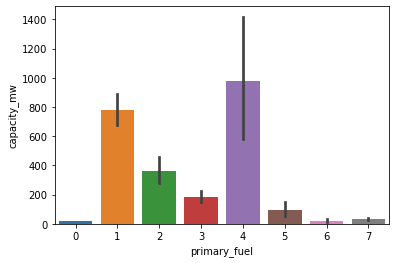

In [12]:
import seaborn as sns

sns.barplot(x="primary_fuel", y="capacity_mw", data=df)

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

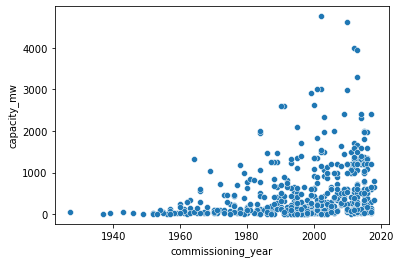

In [14]:
sns.scatterplot(x="commissioning_year", y="capacity_mw", data=df)

In [97]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,Total_generation
0,2.5,28.1839,73.2407,6,2011.0,1,NaN
1,98.0,24.7663,74.6090,1,NaN,2,NaN
2,39.2,21.9038,69.3732,7,NaN,2,NaN
3,135.0,23.8712,91.3602,2,2004.0,2,3643.093120
4,1800.0,21.9603,82.4091,1,2015.0,2,22248.789736


In [15]:
df.isnull().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
geolocation_source      0
Total_generation      530
dtype: int64

In [9]:
df.dropna(subset=['Total_generation'], how='all', inplace = True)
df.isnull().sum()

capacity_mw           0
latitude              6
longitude             6
primary_fuel          0
commissioning_year    0
geolocation_source    0
Total_generation      0
dtype: int64

Dropping rows where Total generation is null

In [10]:
df.dropna(subset=['latitude', 'longitude'], how='all', inplace = True)
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
geolocation_source    0
Total_generation      0
dtype: int64

In [14]:
df.shape

(372, 7)

# Model Selection for capacity_mw

In [11]:
from sklearn.model_selection import train_test_split

x = df.drop(['capacity_mw'], axis = 1)
y = df['capacity_mw']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=25)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred = linreg.predict(x_test)

In [13]:
import numpy as np

print('Score with Linear Regression is', r2_score( y_test, y_pred ))
print('LinearRegression RMSE value : ' , np.sqrt(mean_squared_error( y_test, y_pred )))

Score with Linear Regression is 0.8213953154653983
LinearRegression RMSE value :  290.1297569533482


In [14]:
x = df.drop(['capacity_mw', 'latitude', 'longitude' ], axis = 1)
y = df['capacity_mw']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=25)

In [15]:
linreg.fit(x_train,y_train)
y_pred = linreg.predict(x_test)
print('Score with Linear Regression is', r2_score( y_test, y_pred ))

Score with Linear Regression is 0.8243354322408437


Now we will try with KNeighborsRegressor also

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
knn_grid = [{'n_neighbors': [i+1 for i in range(10)] }, ]

knn_search = GridSearchCV (knn, knn_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)
knn_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
knn_search.best_params_

{'n_neighbors': 4}

In [22]:
result = knn_search.cv_results_
result

{'mean_fit_time': array([0.00586481, 0.00413389, 0.003824  , 0.00400128, 0.00414896,
        0.00433612, 0.00171318, 0.00393829, 0.00438704, 0.00323005]),
 'std_fit_time': array([0.00269425, 0.00357682, 0.00057187, 0.0017377 , 0.00105875,
        0.00156109, 0.00104271, 0.00308038, 0.00145326, 0.00062038]),
 'mean_score_time': array([0.03480945, 0.00722127, 0.00336518, 0.00378098, 0.00242004,
        0.00378671, 0.0041924 , 0.00331855, 0.00297055, 0.00297933]),
 'std_score_time': array([0.01283755, 0.00169505, 0.00080227, 0.00051625, 0.00097058,
        0.00198572, 0.00228003, 0.00235518, 0.00255505, 0.00118241]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},


In [23]:
for mts, param in zip(result['mean_test_score'], result['params']):
    print (mts, param)

-182797.50030605713 {'n_neighbors': 1}
-140980.07383622654 {'n_neighbors': 2}
-119810.57246629658 {'n_neighbors': 3}
-108685.0896653801 {'n_neighbors': 4}
-111153.7221956222 {'n_neighbors': 5}
-113771.18602449093 {'n_neighbors': 6}
-113893.73381677966 {'n_neighbors': 7}
-119608.52248736568 {'n_neighbors': 8}
-118857.6730905145 {'n_neighbors': 9}
-124733.82735896441 {'n_neighbors': 10}


In [24]:
from sklearn.metrics import mean_squared_error

knn_reg = knn_search.best_estimator_
knn_reg.fit(x_train, y_train)
knn_pred = knn_reg.predict(x_test)
print('KNN RMSE value : ' , np.sqrt(mean_squared_error(knn_pred, y_test)))
print('Score with KNN Regression is', r2_score( y_test, knn_pred ))

KNN RMSE value :  317.4858861317616
Score with KNN Regression is 0.7861264175255702


Now will try with RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

ensemble = RandomForestRegressor()
ensemble_grid =  {'n_estimators': [(i+1)*10 for i in range(20)], 'criterion': ['mse', 'mae'], 'bootstrap': [True, False]}


ensemble_search = RandomizedSearchCV(ensemble, ensemble_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=10, verbose=1)
ensemble_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [30]:
ensemble_search.best_params_

{'n_estimators': 200, 'criterion': 'mae', 'bootstrap': True}

In [31]:
result = ensemble_search.cv_results_
result

{'mean_fit_time': array([0.60679488, 0.23182058, 0.67479777, 0.40682678, 0.09432526,
        0.18713498, 0.33612676, 0.224894  , 0.77626486, 0.34141011]),
 'std_fit_time': array([0.01611335, 0.00104718, 0.01627366, 0.00916286, 0.00491579,
        0.00374142, 0.031704  , 0.01547926, 0.01968523, 0.03079714]),
 'mean_score_time': array([0.02367697, 0.01927395, 0.02499824, 0.01565676, 0.0096323 ,
        0.01777096, 0.02223673, 0.01359267, 0.01933517, 0.01044064]),
 'std_score_time': array([0.00466111, 0.00099034, 0.00269397, 0.00294274, 0.00080619,
        0.00402602, 0.00181267, 0.00289682, 0.00151633, 0.00082181]),
 'param_n_estimators': masked_array(data=[180, 150, 200, 120, 60, 120, 200, 110, 180, 110],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_criterion': masked_array(data=['mae', 'mse', 'mae', 'mae', 'mse', 'mse', 'mse', 'mse',
                    'mae', '

In [32]:
for mts, params in zip(result['mean_test_score'], result['params']):
    print(mts, params)

-90717.3276342596 {'n_estimators': 180, 'criterion': 'mae', 'bootstrap': True}
-135243.0873997233 {'n_estimators': 150, 'criterion': 'mse', 'bootstrap': False}
-89096.77493370401 {'n_estimators': 200, 'criterion': 'mae', 'bootstrap': True}
-92624.84822710592 {'n_estimators': 120, 'criterion': 'mae', 'bootstrap': True}
-135143.78398016476 {'n_estimators': 60, 'criterion': 'mse', 'bootstrap': False}
-136307.72491239264 {'n_estimators': 120, 'criterion': 'mse', 'bootstrap': False}
-134864.15091737156 {'n_estimators': 200, 'criterion': 'mse', 'bootstrap': False}
-91824.77432563188 {'n_estimators': 110, 'criterion': 'mse', 'bootstrap': True}
-139610.74407379178 {'n_estimators': 180, 'criterion': 'mae', 'bootstrap': False}
-91508.61998299303 {'n_estimators': 110, 'criterion': 'mae', 'bootstrap': True}


In [33]:
ensemble_reg = ensemble_search.best_estimator_
ensemble_reg.fit(x_train, y_train)
ensemble_pred = ensemble_reg.predict(x_test)
print('RandomForestRegressor RMSE value : ' , np.sqrt(mean_squared_error(ensemble_pred, y_test)))
print('Score with RandomForestRegressor is', r2_score( y_test, ensemble_pred ))

RandomForestRegressor RMSE value :  306.0786731552612
Score with RandomForestRegressor is 0.801219198549418


Now will try with XGBRegressor

In [16]:
max_depth = [1, 2, 3, 4, 5]
learning_rate = [0.01, 0.05, 0.1]
n_estimators = [100, 200, 300, 400, 500]
reg_lambda = [0.001, 0.1, 1.0, 10.0, 100.0] 

tuned_params = {'max_depth': max_depth, 'learning_rate': learning_rate, 
                'n_estimators' : n_estimators, 'reg_lambda' : reg_lambda}

In [17]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb =  XGBRegressor()

xgb_search = RandomizedSearchCV( xgb, tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
xgb_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [18]:
xgb_search.best_params_

{'reg_lambda': 1.0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.01}

In [19]:
result = xgb_search.cv_results_
result

{'mean_fit_time': array([0.42766848, 0.28047075, 0.10658131, 0.15196648, 0.5449728 ,
        0.33337502, 0.20784345, 0.50503297, 0.13492446, 0.2250442 ,
        0.07095919, 0.22066135, 0.58565173, 1.04245954, 0.17331061,
        0.65156384, 1.43821526, 0.32160807, 1.28690567, 0.89511828]),
 'std_fit_time': array([0.01529782, 0.02688878, 0.00674616, 0.00120385, 0.03575197,
        0.01011693, 0.00648125, 0.00304615, 0.0035207 , 0.00718282,
        0.0057194 , 0.0130438 , 0.01343591, 0.31430447, 0.0031678 ,
        0.04068148, 0.01873115, 0.01015011, 0.01223662, 0.08639354]),
 'mean_score_time': array([0.00827432, 0.0048183 , 0.00401716, 0.00722318, 0.00779095,
        0.00602117, 0.00479393, 0.00556126, 0.00468998, 0.00683141,
        0.00803533, 0.00679731, 0.00840492, 0.02034245, 0.0101841 ,
        0.00994987, 0.0131021 , 0.00946093, 0.01225061, 0.01033015]),
 'std_score_time': array([0.00189084, 0.00431965, 0.00358464, 0.00271463, 0.00239884,
        0.0031074 , 0.00391423, 0.002989

In [20]:
for mts, params in zip(result['mean_test_score'], result['params']):
    print(mts, params)

-205.3541785649354 {'reg_lambda': 0.1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1}
-204.57375934852445 {'reg_lambda': 0.1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}
-197.12575478815197 {'reg_lambda': 0.001, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
-218.2022896628368 {'reg_lambda': 100.0, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.1}
-208.94971492648378 {'reg_lambda': 0.1, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.05}
-267.7976978106066 {'reg_lambda': 100.0, 'n_estimators': 400, 'max_depth': 2, 'learning_rate': 0.01}
-195.7393948585479 {'reg_lambda': 1.0, 'n_estimators': 300, 'max_depth': 1, 'learning_rate': 0.05}
-219.64530810974043 {'reg_lambda': 0.1, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}
-264.30401965670836 {'reg_lambda': 1.0, 'n_estimators': 200, 'max_depth': 1, 'learning_rate': 0.01}
-207.430274430078 {'reg_lambda': 0.1, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
-330.

In [21]:
xgb_reg = xgb_search.best_estimator_
xgb_reg.fit(x_train, y_train)
xgb_pred = xgb_reg.predict(x_test)

print('XGBRegressor RMSE value : ' , np.sqrt(mean_squared_error(xgb_pred, y_test)))
print('Score with XGBRegressor is', r2_score( y_test, xgb_pred ))

XGBRegressor RMSE value :  312.84352797871065
Score with XGBRegressor is 0.7923353153610502


Now will try with DecisionTreeRegressor

In [22]:
max_depth = list(range(3,30))
param_grid = {'max_depth' : max_depth }

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()

dtr_search = GridSearchCV( dtr, param_grid, cv =10 )
dtr_search.fit( x_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [25]:
dtr_search.best_params_

{'max_depth': 4}

In [26]:
result = dtr_search.cv_results_
result

{'mean_fit_time': array([0.00373268, 0.00551701, 0.00442092, 0.00638602, 0.00655377,
        0.00504277, 0.00516765, 0.00599597, 0.00536997, 0.00482185,
        0.0051904 , 0.00594933, 0.00484385, 0.00615585, 0.00508523,
        0.00395567, 0.00327086, 0.00705209, 0.00799444, 0.00313857,
        0.00443385, 0.0064549 , 0.00518744, 0.00475132, 0.00335701,
        0.0042629 , 0.00709548]),
 'std_fit_time': array([0.00281768, 0.00639015, 0.00678825, 0.00783012, 0.00507508,
        0.00439769, 0.00427476, 0.00309844, 0.00287305, 0.00286035,
        0.00220114, 0.00340653, 0.00225533, 0.00346729, 0.00377758,
        0.00362033, 0.00517285, 0.00267381, 0.00684873, 0.00430282,
        0.00629445, 0.00382653, 0.00419704, 0.00535553, 0.0064773 ,
        0.00398212, 0.00374209]),
 'mean_score_time': array([0.00217357, 0.0019495 , 0.00325582, 0.00337994, 0.00198169,
        0.0040406 , 0.00405519, 0.00315976, 0.00393462, 0.00432899,
        0.00358577, 0.00377924, 0.00428822, 0.00351865, 0.003845

In [27]:
for mts, params in zip(result['mean_test_score'], result['params']):
    print(mts, params)

0.7079759264038321 {'max_depth': 3}
0.7490091283145512 {'max_depth': 4}
0.7253923662076183 {'max_depth': 5}
0.7256511715400769 {'max_depth': 6}
0.7146981889971459 {'max_depth': 7}
0.6653697468014869 {'max_depth': 8}
0.6989344527574688 {'max_depth': 9}
0.682410426914054 {'max_depth': 10}
0.7013285512871034 {'max_depth': 11}
0.707101918956167 {'max_depth': 12}
0.6837684929485166 {'max_depth': 13}
0.6830463100565213 {'max_depth': 14}
0.6922084778373951 {'max_depth': 15}
0.7216686413326767 {'max_depth': 16}
0.7006256594016832 {'max_depth': 17}
0.7036086830595885 {'max_depth': 18}
0.6788377113243802 {'max_depth': 19}
0.707045490701881 {'max_depth': 20}
0.6717646475114754 {'max_depth': 21}
0.710544322414522 {'max_depth': 22}
0.6840478156224463 {'max_depth': 23}
0.6619016725349937 {'max_depth': 24}
0.6530566153527702 {'max_depth': 25}
0.6928666181278799 {'max_depth': 26}
0.6905727538222284 {'max_depth': 27}
0.7000413386045444 {'max_depth': 28}
0.6929766042737859 {'max_depth': 29}


In [28]:
dtr_reg = dtr_search.best_estimator_
dtr_reg.fit(x_train, y_train)
dtr_pred = dtr_reg.predict(x_test)

print('DecisionTreeRegressor RMSE value : ' , np.sqrt(mean_squared_error(dtr_pred, y_test)))
print('Score with DecisionTreeRegressor is', r2_score( y_test, dtr_pred ))

DecisionTreeRegressor RMSE value :  319.3319374904785
Score with DecisionTreeRegressor is 0.7836320106973261


In [35]:
import pickle
filename = 'Global_power_plant_capacitymw.pkl'
pickle.dump(linreg, open(filename, 'wb' ))

Saving the model with Linear Regression as the accuracy is 83% and is greatest among all other models.

In [36]:
filename = 'Global_power_plant_capacitymw.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8243354322408437


# Model Selection for Primary Fuel

In [37]:
x = df.drop(['primary_fuel'], axis = 1)
y = df['primary_fuel']


In [38]:
x

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,Total_generation
3,135.0,23.8712,91.3602,2004.0,2,3643.093120
4,1800.0,21.9603,82.4091,2015.0,2,22248.789736
5,250.0,23.7689,68.6447,2005.0,2,5507.749000
6,60.0,10.4547,77.0078,1970.0,2,608.372850
7,192.0,32.2258,77.2070,2010.0,2,3447.784450
...,...,...,...,...,...,...
883,400.0,30.5669,79.5468,2006.0,2,7629.102800
890,1470.0,22.8725,73.3588,1986.0,2,27015.283000
891,540.0,20.2727,78.9792,2010.0,2,7236.948900
894,62.4,30.3033,77.5684,1991.0,2,951.547950


In [39]:
y

3      2
4      1
5      1
6      3
7      3
      ..
883    3
890    1
891    1
894    3
900    1
Name: primary_fuel, Length: 372, dtype: int32

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=25)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(max_depth=10, max_features = 0.25, n_estimators=25)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print('Classification Report with RandomForestClassifier :', "\n",  classification_report(y_test,rf_pred))
print('Accuracy with RandomForestClassifier : ', accuracy_score(rf_pred,y_test) , "\n")
print('Confusion Matrix with RandomForestClassifier : ', "\n", confusion_matrix(rf_pred,y_test), "\n")


Classification Report with RandomForestClassifier : 
               precision    recall  f1-score   support

           1       0.83      0.83      0.83        52
           2       0.64      0.45      0.53        20
           3       0.74      0.93      0.82        45
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2

    accuracy                           0.76       123
   macro avg       0.44      0.44      0.44       123
weighted avg       0.72      0.76      0.74       123

Accuracy with RandomForestClassifier :  0.7642276422764228 

Confusion Matrix with RandomForestClassifier :  
 [[43  3  2  4  0]
 [ 2  9  1  0  2]
 [ 7  8 42  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]] 



In [52]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)

print('Classification Report with DecisionTreeClassifier :', "\n",  classification_report(y_test,dtc_pred))
print('Accuracy with DecisionTreeClassifier : ', accuracy_score(dtc_pred,y_test) , "\n")
print('Confusion Matrix with DecisionTreeClassifier : ', "\n", confusion_matrix(dtc_pred,y_test), "\n")

Classification Report with DecisionTreeClassifier : 
               precision    recall  f1-score   support

           1       0.76      0.81      0.79        52
           2       0.00      0.00      0.00        20
           3       0.54      0.82      0.65        45
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2

    accuracy                           0.64       123
   macro avg       0.26      0.33      0.29       123
weighted avg       0.52      0.64      0.57       123

Accuracy with DecisionTreeClassifier :  0.6422764227642277 

Confusion Matrix with DecisionTreeClassifier :  
 [[42  1  8  4  0]
 [ 0  0  0  0  0]
 [10 19 37  0  2]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]] 



In [54]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

print('Classification Report with XGBClassifier :', "\n",  classification_report(y_test,xgb_pred))
print('Accuracy with XGBClassifier : ', accuracy_score(xgb_pred,y_test) , "\n")
print('Confusion Matrix with XGBClassifier : ', "\n", confusion_matrix(xgb_pred,y_test), "\n")


[16:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report with XGBClassifier : 
               precision    recall  f1-score   support

           1       0.83      0.75      0.79        52
           2       0.59      0.50      0.54        20
           3       0.72      0.93      0.82        45
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2

    accuracy                           0.74       123
   macro avg       0.43      0.44      0.43       123
weighted avg       0.71      0.74      0.72       123

Accuracy with XGBClassifier :  0.7398373983739838 

Confusion Matrix with XGBClassifier :  
 [[39  2  2  4  0]
 [ 5 10  1  0  1]
 [ 8  7 42  0  1]
 [ 0  0 

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

print('Classification Report with LogisticRegression :', "\n",  classification_report(y_test,lr_predict))
print('Accuracy with LogisticRegression : ', accuracy_score(lr_predict,y_test) , "\n")
print('Confusion Matrix with LogisticRegression : ', "\n", confusion_matrix(lr_predict,y_test), "\n")

Classification Report with LogisticRegression : 
               precision    recall  f1-score   support

           1       0.82      0.69      0.75        52
           2       0.50      0.05      0.09        20
           3       0.53      0.91      0.67        45
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2

    accuracy                           0.63       123
   macro avg       0.37      0.33      0.30       123
weighted avg       0.62      0.63      0.58       123

Accuracy with LogisticRegression :  0.6341463414634146 

Confusion Matrix with LogisticRegression :  
 [[36  0  4  4  0]
 [ 1  1  0  0  0]
 [15 19 41  0  2]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]] 



In [58]:
import pickle
filename = 'Global_power_plant_primaryfuel.pkl'
pickle.dump(rf, open(filename, 'wb' ))

Saving the model with RandomForestClassifier as the accuracy is 77 % the greatest among all the other models

In [59]:
filename = 'Global_power_plant_primaryfuel.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7642276422764228
